In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Diabetes.csv')

In [2]:
print(data.head())

   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
print(data.describe())

                Id  Pregnancies      Glucose  BloodPressure  SkinThickness  \
count  2768.000000  2768.000000  2768.000000    2768.000000    2768.000000   
mean   1384.500000     3.742775   121.102601      69.134393      20.824422   
std     799.197097     3.323801    32.036508      19.231438      16.059596   
min       1.000000     0.000000     0.000000       0.000000       0.000000   
25%     692.750000     1.000000    99.000000      62.000000       0.000000   
50%    1384.500000     3.000000   117.000000      72.000000      23.000000   
75%    2076.250000     6.000000   141.000000      80.000000      32.000000   
max    2768.000000    17.000000   199.000000     122.000000     110.000000   

           Insulin          BMI  DiabetesPedigreeFunction          Age  \
count  2768.000000  2768.000000               2768.000000  2768.000000   
mean     80.127890    32.137392                  0.471193    33.132225   
std     112.301933     8.076127                  0.325669    11.777230   
m

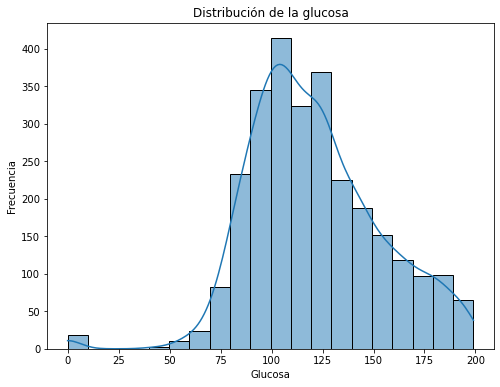

In [4]:
plt.figure(figsize=(8,6))
sns.histplot(data['Glucose'], bins=20, kde=True)
plt.title('Distribución de la glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Frecuencia')
plt.show()

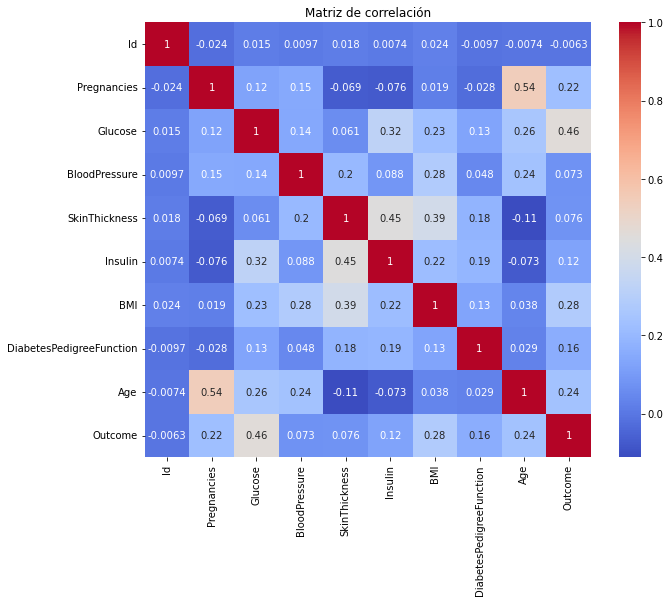

In [5]:
correlation_matrix = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

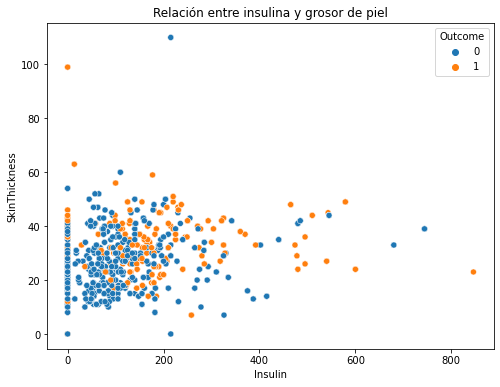

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Insulin', y='SkinThickness', hue='Outcome')
plt.title('Relación entre insulina y grosor de piel')
plt.show()

In [23]:
data.fillna(data.median(), inplace=True)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_scaled = scaler.fit_transform(X)

model = LogisticRegression(max_iter=1000, solver='lbfgs')

rfe = RFE(model, n_features_to_select=5)

rfe.fit(X_scaled, y)

selected_columns = X.columns[rfe.support_]

print('Características seleccionadas: ')
print(selected_columns)

Características seleccionadas: 
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction'],
      dtype='object')


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(data[selected_columns], y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Exactitud: {accuracy:.2f}')
print('Matriz de confusión')
print(conf_matrix)
print('Informe de clasificación: ')
print(classification_rep)

Exactitud: 0.76
Matriz de confusión
[[325  42]
 [ 91  96]]
Informe de clasificación: 
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       367
           1       0.70      0.51      0.59       187

    accuracy                           0.76       554
   macro avg       0.74      0.70      0.71       554
weighted avg       0.75      0.76      0.75       554



In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [29]:
new_data = pd.DataFrame({
    'Pregnancies': [3],
    'Glucose': [120],
    'BloodPressure': [90],
    'BMI': [25],
    'DiabetesPedigreeFunction': [0.4],
})

new_data_scaled = scaler.transform(new_data)
prediction = best_model.predict(new_data_scaled)

print(f'Prediccion: {prediction}')

Prediccion: [1]
